**Experiment No. 6**

Data Aggregation

Problem Statement: Analyzing Sales Performance by Region in a Retail Company

Dataset: "Retail_Sales_Data.csv"

Description: The dataset contains information about sales transactions in a retail company. It includes attributes such as transaction date, product category, quantity sold, and sales
amount. The goal is to perform data aggregation to analyze the sales performance by region
and identify the top-performing regions.


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Retail_Sales_Data.csv")
data.head()

,Transaction Date,Region,Product Category,Quantity Sold,Sales Amount,Customer Name,Transaction ID,Payment Method
0,2019-01-16,West,Home Decor,9,909.84,Melinda Pham,7b094307-bcd3-4f16-84a7-2bca783fff4f,Credit Card
1,2021-09-17,North,Clothing,8,900.29,Shelly Perez,fb437a2e-4ebf-4807-b84e-f2dfae83541a,Credit Card
2,2020-03-27,East,Electronics,3,506.07,Scott White,b6ead965-ed1c-4bdc-95ac-864685467abd,Online Banking
3,2019-02-11,South,Clothing,9,744.70,Gloria Williams,400773f4-a820-47b6-b3c4-2cc2a5467e73,Cash
4,2020-01-15,East,Books,4,245.55,Michael Sims,10b62e7a-38f8-4f27-a989-b99b55d76223,Cash


In [3]:
# Step 2: Explore the Dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction Date  100 non-null    object 
 1   Region            100 non-null    object 
 2   Product Category  100 non-null    object 
 3   Quantity Sold     100 non-null    int64  
 4   Sales Amount      100 non-null    float64
 5   Customer Name     100 non-null    object 
 6   Transaction ID    100 non-null    object 
 7   Payment Method    100 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.4+ KB
None


In [4]:
print(data.describe())

       Quantity Sold  Sales Amount
count     100.000000    100.000000
mean        5.700000    544.873300
std         2.904194    276.530738
min         1.000000     23.140000
25%         3.000000    336.295000
50%         5.500000    554.715000
75%         8.000000    781.757500
max        10.000000    984.850000


In [5]:
data.isnull().sum()

,0
Transaction Date,0
Region,0
Product Category,0
Quantity Sold,0
Sales Amount,0
Customer Name,0
Transaction ID,0
Payment Method,0


In [6]:
# Step 4: Group by Region and Calculate Total Sales

total_sales_by_region = data.groupby('Region')['Sales Amount'].sum().reset_index()

total_sales_by_region = total_sales_by_region.sort_values(by='Sales Amount', ascending=False)
print(total_sales_by_region)

  Region  Sales Amount
3   West      15772.98
0   East      14382.28
1  North      13031.74
2  South      11300.33


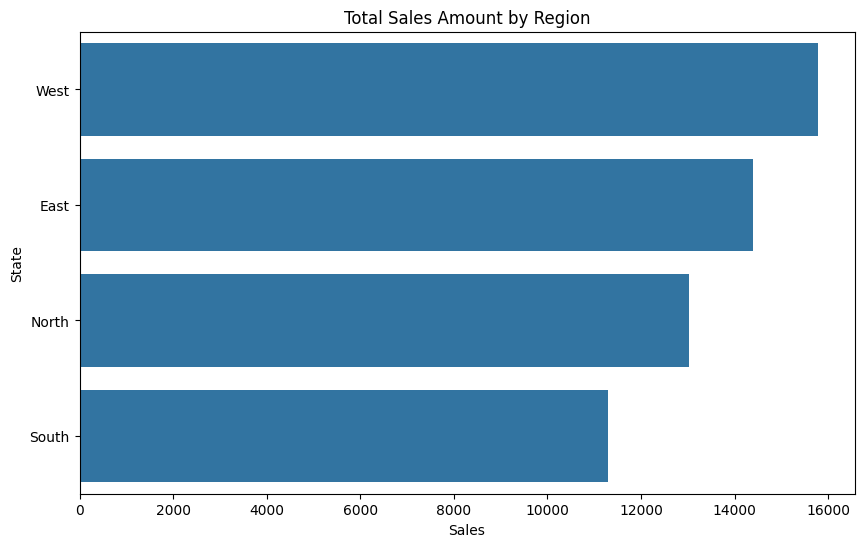

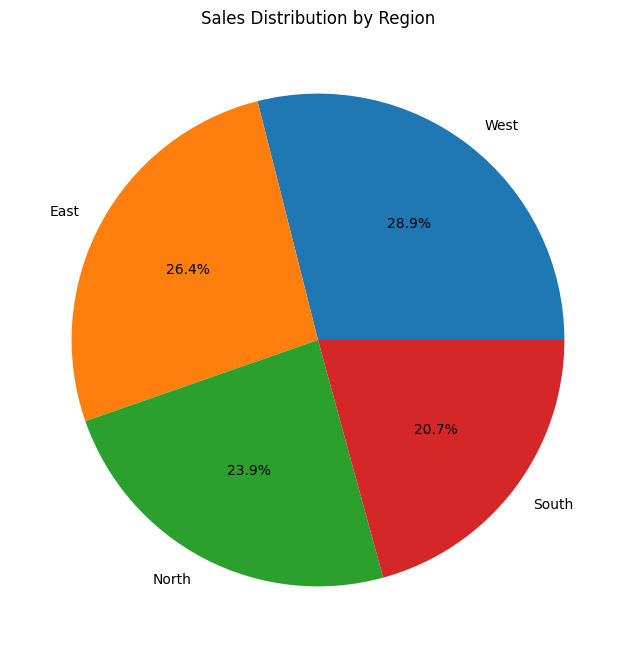

In [14]:
# Step 5: Visualize Sales Distribution by Region

import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for total sales by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Amount', y='Region', data=total_sales_by_region)
plt.title('Total Sales Amount by Region')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()

# Alternatively, create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_sales_by_region['Sales Amount'], labels=total_sales_by_region['Region'], autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.show()

In [8]:
# Step 6: Identify Top-Performing Regions

top_regions = total_sales_by_region.head(5)  # Adjust number as needed
print("Top Performing Regions:")
print(top_regions)

Top Performing Regions:
  Region  Sales Amount
3   West      15772.98
0   East      14382.28
1  North      13031.74
2  South      11300.33


In [9]:
# Step 7: Group by Region and Product Category

total_sales_by_region_category = data.groupby(['Region', 'Product Category'])['Sales Amount'].sum().unstack(fill_value=0)

# Display the result
print(total_sales_by_region_category)

Product Category    Books  Clothing  Electronics  Home Decor
Region                                                      
East               759.89   4293.54      6153.44     3175.41
North             2235.48   4121.55      3208.94     3465.77
South              573.38   4977.85      2581.59     3167.51
West              4907.12   3185.51      3043.47     4636.88


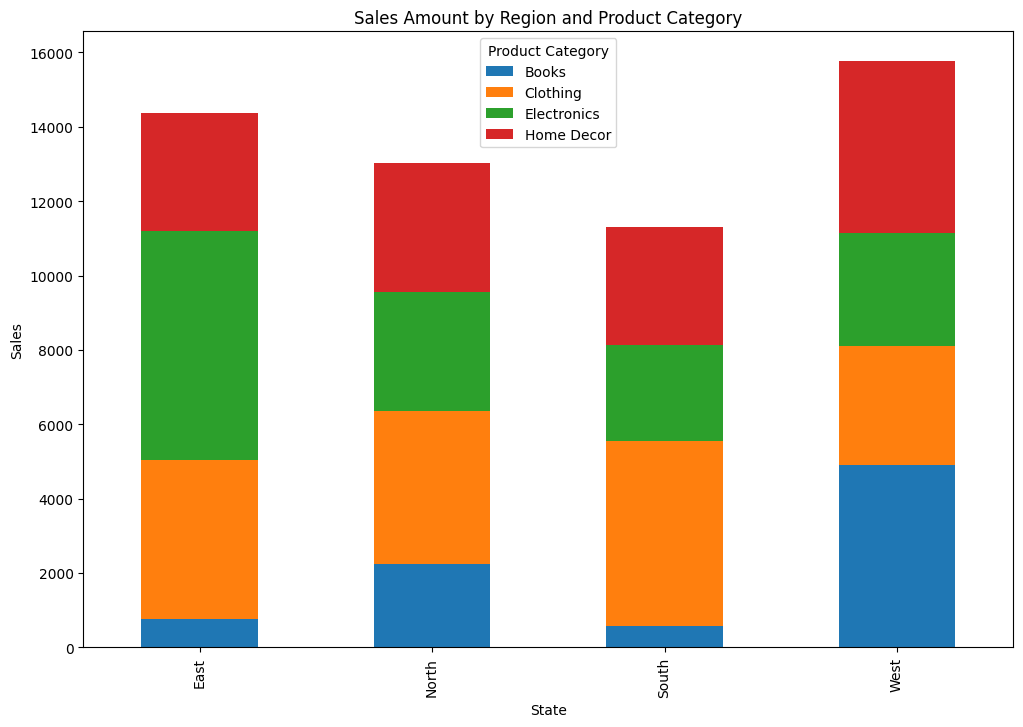

In [10]:
# Step 8: Create Stacked/Grouped Bar Plots

total_sales_by_region_category.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sales Amount by Region and Product Category')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Product Category')
plt.show()


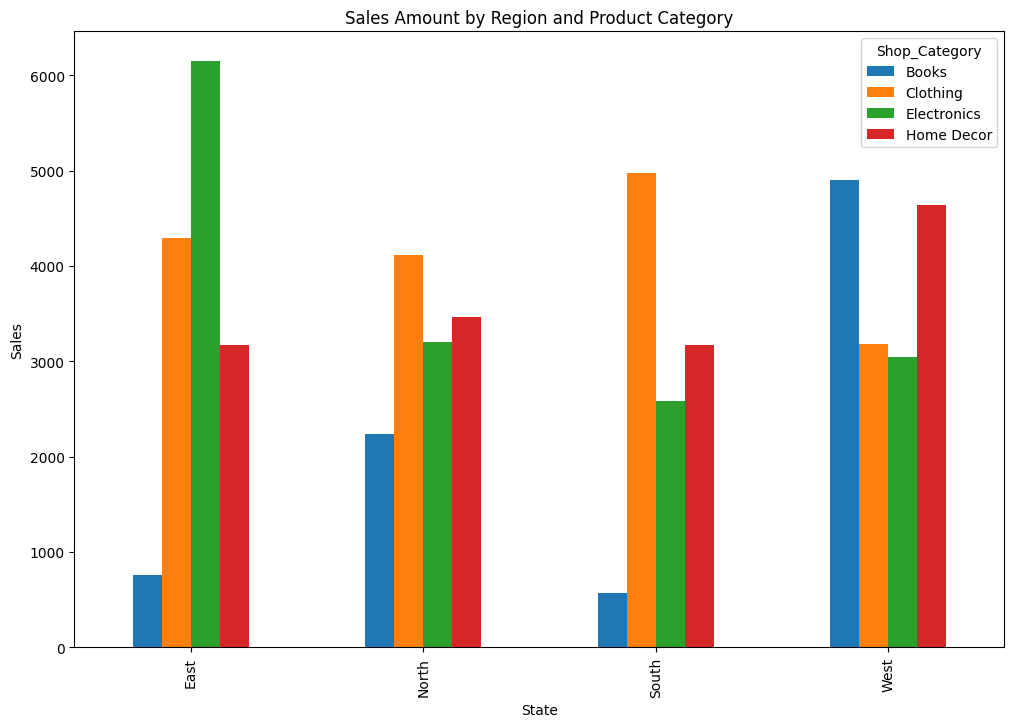

In [11]:
# Alternatively, create a grouped bar plot
total_sales_by_region_category.plot(kind='bar', figsize=(12, 8))
plt.title('Sales Amount by Region and Product Category')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Shop_Category')
plt.show()